In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pmdarima.arima import auto_arima
import os
import errno
%matplotlib inline

# Preliminary exploratory analysis

This includes importing the data and manipulating it. During this step plots and reviewed and summarized and obvious temporal structures are noted. These would include trend seasonality, anomalies like missing data, corruption, and outliers, and any other structures that may impact forecasting. 


## Adapt the data to the Time Series format

In [2]:
# Import the data 
dataImport=pd.read_csv("~/Documents/Kschool/00_TFM/data1.csv")
dataImport.head(5)

,measure_time,minute_counter,val01_ambient_temperature,val01_ambient_winddir,val01_ambient_windspeed,val01_controller_hubtemperature,val01_controller_toptemperature,val01_electrical_activepower,val01_electrical_cosphi,val01_electrical_currentphase1,...,val01_meteorological_windspeed,val01_nacelle_direction,val01_nacelle_temperature,val01_rotor_bladespitchangle1,val01_rotor_hydraulicoilpressure,val01_rotor_hydraulicoiltemperature,val01_rotor_rpm,val01_rotorsystem_bladespitchangle,val01_rotorsystem_rotorrpm,val01_spinner_temperature
0,2019-01-01 00:00,0,10.75,54.699997,9.20,21.0,35.0,1605.400024,1.0,1342.599976,...,10.353333,51.038040,23.000000,-1.237798,194.024994,24.919531,14.755315,-1.758000,14.810000,12.0
1,2019-01-01 00:10,600,10.00,54.810001,9.50,21.0,35.0,1679.863647,1.0,1429.161255,...,10.490322,50.997501,23.000000,-0.742385,190.137497,24.898567,14.745159,-1.699000,14.880000,12.0
2,2019-01-01 00:20,1200,10.00,53.139999,8.50,21.0,35.0,1527.050049,1.0,1298.000000,...,9.800000,54.200001,23.000000,-1.194504,190.850006,24.877604,14.735003,-1.572000,14.808248,12.0
3,2019-01-01 00:30,1800,10.00,54.400002,8.87,21.0,35.0,1378.040039,1.0,1209.400024,...,9.153334,54.200001,23.804422,-1.403579,184.000000,24.856638,14.724848,-1.951333,14.888750,12.0
4,2019-01-01 00:40,2400,10.00,50.920002,9.25,21.0,35.0,1315.299927,1.0,1152.000000,...,8.700000,54.200001,24.000000,-1.612653,188.937500,24.835674,14.714692,-2.133000,14.836264,12.0


In [3]:
dataImport.tail(5)

,measure_time,minute_counter,val01_ambient_temperature,val01_ambient_winddir,val01_ambient_windspeed,val01_controller_hubtemperature,val01_controller_toptemperature,val01_electrical_activepower,val01_electrical_cosphi,val01_electrical_currentphase1,...,val01_meteorological_windspeed,val01_nacelle_direction,val01_nacelle_temperature,val01_rotor_bladespitchangle1,val01_rotor_hydraulicoilpressure,val01_rotor_hydraulicoiltemperature,val01_rotor_rpm,val01_rotorsystem_bladespitchangle,val01_rotorsystem_rotorrpm,val01_spinner_temperature
11948,2019-03-24 23:20,7168800,10.957346,48.150002,12.400000,24.000000,40.0,2000.149902,1.0,1663.000000,...,12.683333,47.900002,26.000000,7.820000,201.126663,37.155930,14.696914,7.010000,14.816483,15.000000
11949,2019-03-24 23:30,7169400,10.877778,53.355000,10.639999,23.395304,40.0,1996.910034,1.0,1644.233276,...,11.000000,48.578239,25.786913,3.409667,183.951675,37.290157,14.694828,1.529000,14.673334,15.000000
11950,2019-03-24 23:40,7170000,10.704166,51.500000,12.900000,23.000000,40.0,2001.699951,1.0,1648.645142,...,11.393548,53.900002,25.218334,1.670968,193.550003,37.424385,14.692742,3.480000,15.000000,14.908334
11951,2019-03-24 23:50,7170600,10.938889,60.066666,11.900001,23.000000,40.0,1980.800049,1.0,1656.666626,...,10.200000,58.908924,25.000000,-0.656667,197.296661,37.558613,14.690657,2.056667,14.600000,14.000000
11952,2019-03-25 00:00,7171200,10.947619,61.333332,12.066667,23.000000,40.0,1999.024902,1.0,1663.500000,...,10.783334,59.099998,25.000000,3.850829,188.750000,37.692841,14.688572,3.293333,14.766666,14.000000


In [4]:
dataImport=dataImport.drop('minute_counter',axis=1) # drop column with no relevant information.

In [5]:
dataImport.head(5)

,measure_time,val01_ambient_temperature,val01_ambient_winddir,val01_ambient_windspeed,val01_controller_hubtemperature,val01_controller_toptemperature,val01_electrical_activepower,val01_electrical_cosphi,val01_electrical_currentphase1,val01_electrical_currentphase2,...,val01_meteorological_windspeed,val01_nacelle_direction,val01_nacelle_temperature,val01_rotor_bladespitchangle1,val01_rotor_hydraulicoilpressure,val01_rotor_hydraulicoiltemperature,val01_rotor_rpm,val01_rotorsystem_bladespitchangle,val01_rotorsystem_rotorrpm,val01_spinner_temperature
0,2019-01-01 00:00,10.75,54.699997,9.20,21.0,35.0,1605.400024,1.0,1342.599976,1349.666626,...,10.353333,51.038040,23.000000,-1.237798,194.024994,24.919531,14.755315,-1.758000,14.810000,12.0
1,2019-01-01 00:10,10.00,54.810001,9.50,21.0,35.0,1679.863647,1.0,1429.161255,1435.032227,...,10.490322,50.997501,23.000000,-0.742385,190.137497,24.898567,14.745159,-1.699000,14.880000,12.0
2,2019-01-01 00:20,10.00,53.139999,8.50,21.0,35.0,1527.050049,1.0,1298.000000,1302.000000,...,9.800000,54.200001,23.000000,-1.194504,190.850006,24.877604,14.735003,-1.572000,14.808248,12.0
3,2019-01-01 00:30,10.00,54.400002,8.87,21.0,35.0,1378.040039,1.0,1209.400024,1213.400024,...,9.153334,54.200001,23.804422,-1.403579,184.000000,24.856638,14.724848,-1.951333,14.888750,12.0
4,2019-01-01 00:40,10.00,50.920002,9.25,21.0,35.0,1315.299927,1.0,1152.000000,1155.000000,...,8.700000,54.200001,24.000000,-1.612653,188.937500,24.835674,14.714692,-2.133000,14.836264,12.0


In [6]:
# convert the rows with data in float.
for col in dataImport.columns[1:]:
    dataImport[col]=dataImport[col].apply(pd.to_numeric,errors='ignore') 

#set the measure_time as Index for the Time Series analysis
dataImport.set_index('measure_time', inplace=True)

# convert row to datetime for the time series analysis.
dataImport.index=pd.to_datetime(dataImport.index,format="%Y-%m-%d %H:%M:%S",errors="ignore") 

In [7]:
print(dataImport.index.freq)

None


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1ba503c8>,
      dtype=object)

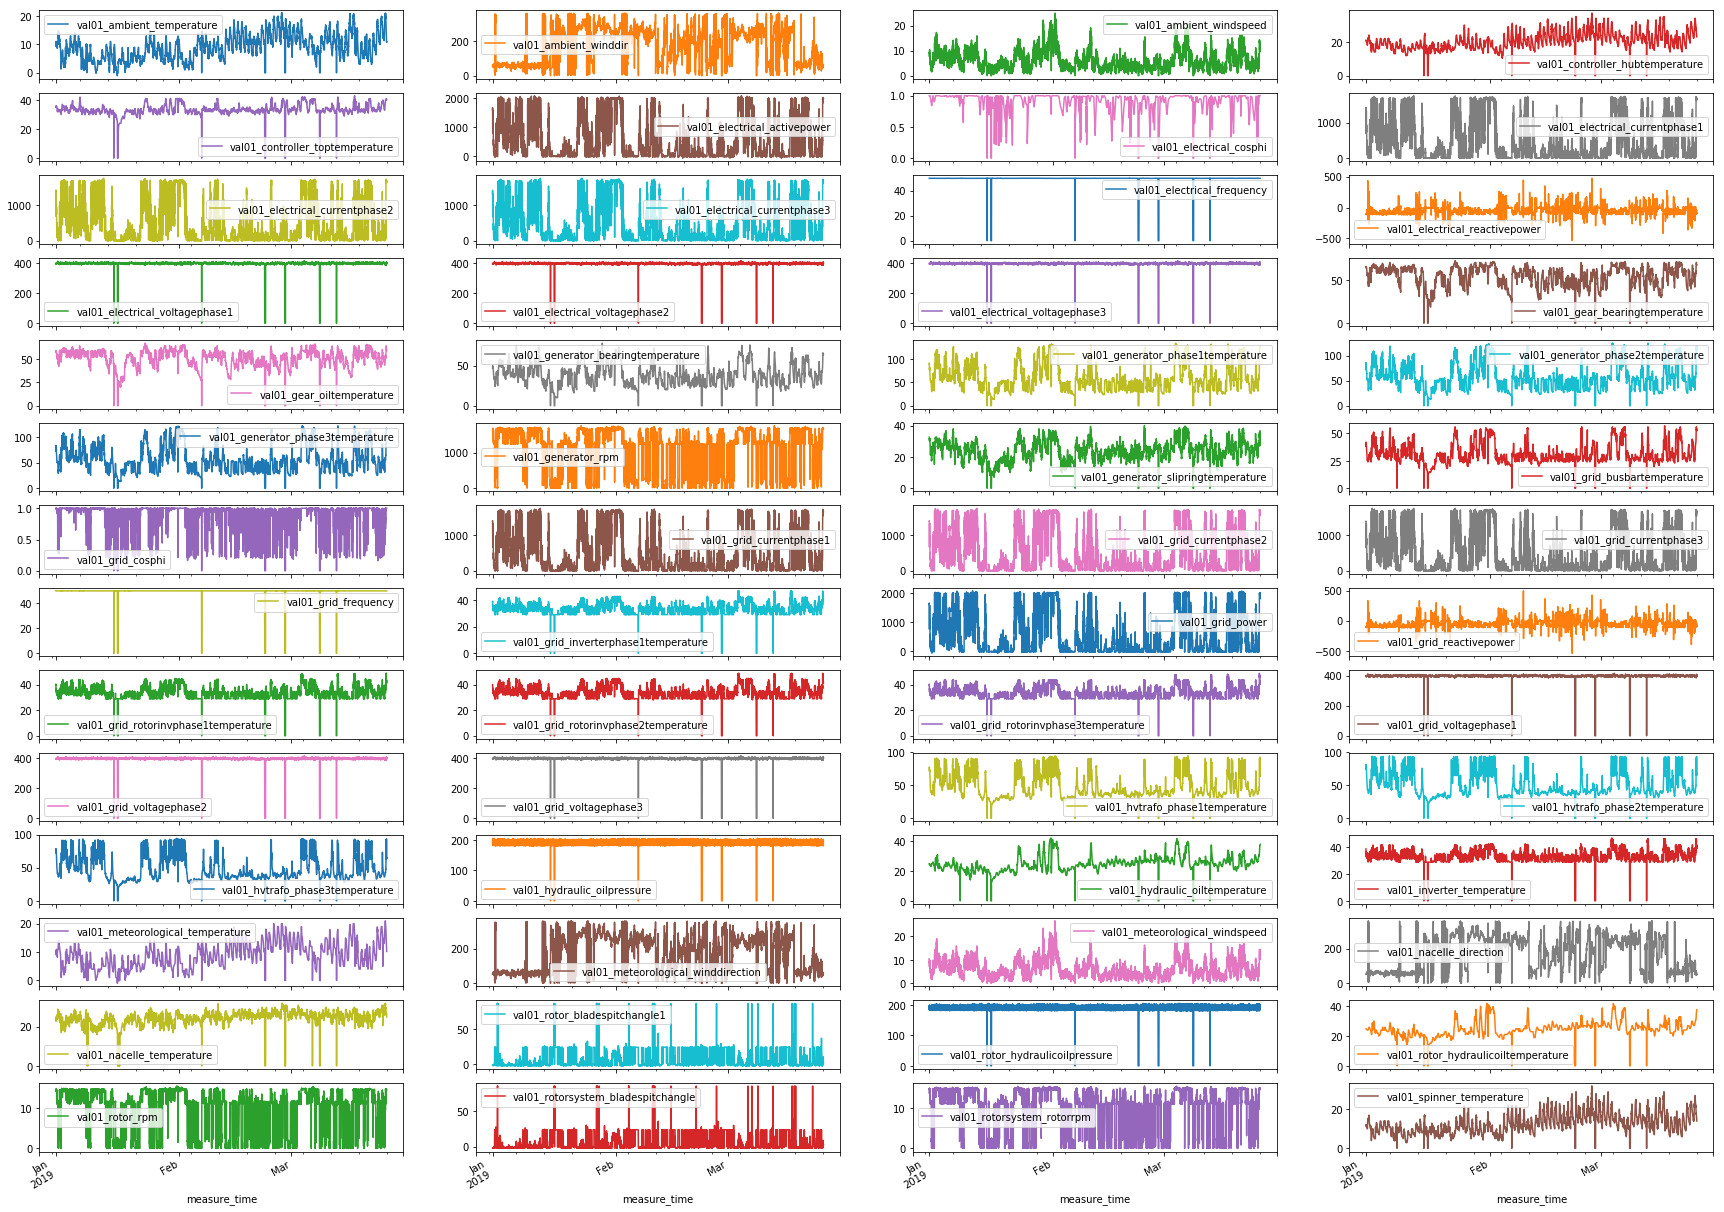

In [8]:
# Plot 56 columns 
dataImport.plot(subplots=True, layout=(15, 4), figsize=(30, 25), sharex=True)

It is clear from the plot that the outliers in the data corrupt the tendecies. It is necessary to decide if outliers should be either corrected or deleted.

## Clean the data

### Outliers

Outliers have an impact on Time Series modelling. In general, the first step is to plot the data and check if there is any anomaly. Once it is detected is part of the data science work to eliminate them or transform them (in general transformed to the average).
There are many different ways (and softwares: https://github.com/rob-med/awesome-TS-anomaly-detection) for indentifying outliers:

-K Means (clustering) (http://amid.fish/anomaly-detection-with-k-means-clustering)

-Isolation forest (https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46)

-Support vector machine based (https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46)

-Gaussian distribution (https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46)

-Prophet (https://towardsdatascience.com/anomaly-detection-time-series-4c661f6f165f)

Outlier detection is part of future developments.


### Missing data

In [9]:
#dummy data used as reference
date_range = pd.date_range('2019-01-01 00:00', '2019-03-25 00:00:00', freq='10Min')
df = pd.DataFrame(np.random.randint(1, 20, (date_range.shape[0], 1)))
df.index = date_range  # set index
df_missing = dataImport

#check for missing datetimeindex values based on reference index (with all values)
missing_dates = df.index[~df.index.isin(df_missing.index)]

print(missing_dates)

DatetimeIndex([], dtype='datetime64[ns]', freq='10T')


No missing data is noticed in the Time Series

## Dealing with Time Series Modelling

Time Series can be separated in 2 types:

A.  One (or few) time series that we want to understand and forecast. Modeled with SARIMA and VARIMA models.

B.  A lot of time series that we want to forecast each of them. Baseline (simple) models: last year, last month, mean and median of last N months. Cluster the TS and use the ts belonging to each group as data for a Regression problem. There is not “an approach to rule them all”, it’s on Data Scientist’s hand to find the best modelling strategy.

This project is about option B.

### Trend seasonality

Ideally, the seasonality should be analysed in each cluster of the Time Series using K-means (most recommendable option), in order to create a more accurate forecasting model. However, in this project clustering the Time Series will be left for future developments. Some references to take into account for future developments:

https://tslearn.readthedocs.io/en/latest/auto_examples/plot_kmeans.html#sphx-glr-auto-examples-plot-kmeans-py

https://blog.newrelic.com/product-news/optimizing-k-means-clustering/

In [10]:
# Let's check the seasonality in each signal

# XXXX--- This code doesn't work bug in the code not solved yet---XXXX

from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
for column in dataImport:
    result = seasonal_decompose(dataImport[column], model='add')
    fig = result.plot()
    plot_mpl(fig)

ValueError: freq T not understood. Please report if you think this is in error.

## Export the data reviewed and cleaned

In [11]:
# Export the data refined for the model
export_csv=dataImport.to_csv('/Users/juanfatri/Documents/Kschool/00_TFM/dataModel.csv',index=True, header=True)